# Lecture 10: Introduction to Probability

CBIO (CSCI) 4835/6835: Introduction to Computational Biology

## Overview and Objectives

Before we can jump into computational modeling, we have to cover some fundamental concepts in probability. Probability is the study of events that don't always happen, and is a powerful way of quantifying and making explicit our expectations of uncertain events. By the end of this lecture, you should be able to

 - Define probability and how to compute it for an event
 - Understand statistical dependence and independence
 - Explain conditional probability and its role in Bayes' Theorem

## Part 1: Probability

When we say "what is the probability of X", we're discussing a way of quantifying uncertainty.

This uncertainty relates to *one particular event*--in the above statement, that event is "X"--happening out of a *universe of all possible events*.

An easy example is rolling a die: the universe consists of all possible outcomes (any of the 6 sides), whereas any subset is a single event (one side; an even number; etc).

### Relationship with Statistics

Think of "probability" and "statistics" as two sides of the same coin: you cannot have one without the other.

![probstats](IntroProbability/slide_3.jpg)

Typically, when we consider probabilistic processes, we're concerned with *distributions* of probabilities.

Perhaps you've heard of the Normal (or Gaussian) distribution?

Text(0.5,1,'Various Normal Distributions')

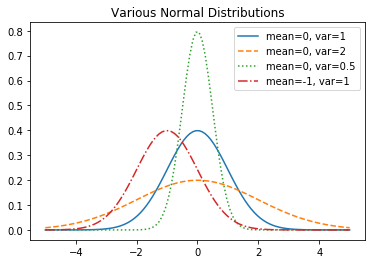

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
xs = np.linspace(-5, 5, 100)
plt.plot(xs, norm.pdf(xs, loc = 0, scale = 1), '-', label = "mean=0, var=1")
plt.plot(xs, norm.pdf(xs, loc = 0, scale = 2), '--', label = "mean=0, var=2")
plt.plot(xs, norm.pdf(xs, loc = 0, scale = 0.5), ':', label = "mean=0, var=0.5")
plt.plot(xs, norm.pdf(xs, loc = -1, scale = 1), '-.', label = "mean=-1, var=1")
plt.legend(loc = 0)
plt.title("Various Normal Distributions")

The Normal distribution has an explicit way of computing the probability of observing a particular value of $X$, given the distribution's mean and variance.

 - The probability is always largest around the mean (**expected value**)

 - Variance is a measure of how "concentrated" the distribution is around the mean

All distributions have these properties. The thing to keep in mind is that **not all distributions have this nice, closed-form definition**.

 - We may not know the mean, or the variance

 - We may not even have full access to the distribution or data itself

 - There may not be a "closed-form" equation for the distribution (**parametric vs nonparametric**)

Much of probability and statistics is *estimating* these missing values so we can still say something meaningful about certain events, and place bounds on our uncertainty.

We have a special notation for probability:

$P(X = x)$

$P$ is the universal symbol for "probability of", followed by some *event*. In this case, our event is "$X = x$".

 - Capital $X$ is the random process itself. It's the thing that generated our data in the first place. We almost never have direct access to $X$ in the real world (if we did, we probably wouldn't need probability)

 - Lowercase $x$ is a single observation from the random process $X$. This is, essentially, a data point. It's a single incarnation, a manifestation of the underlying process that is tangible, and from which we try to infer something about the process that generated it.

So when we say $X = x$, we're asking for the *event* where the random process $X$ generates the specific value $x$.

### Confused yet?

Let's take the example of a 6-sided die.

 - There are six sides the die can land on. These are specific *events*, so they can be represented with lowercase letters (e.g. $x_1$, $x_2$, and so on)

 - The process that generates these events is the actual rolling of the die. We'll call that $R$.

So, if you wanted to ask: what is the probability of rolling a 6?--what is the notation you would use?

$P(R = x_6)$

A few other properties to be aware of:

 - Probabilities are *always* between 0 and 1; no exceptions. This means, for any arbitrary event $A$, $0 \le P(A) \le 1$.

 - The probability of *something* happening is always exactly 1. Put another way, if you combine all possible events together and ask the probability of one of them occurring, that probability is 1.

 - If $A$ and $B$ are two possible events that disparate (as in, they have no overlap), then the probability of either one of them happening is just the sum of their individual probabilities: $P(A, B) = P(A) + P(B)$.

These three points are referred to as the **Axioms of Probability** and form the foundation for pretty much every other rule of probability that has ever been and will ever be discovered.

### Visualization

A good way of learning probability is to visualize it. Take this spinner:

![spinner](IntroProbability/spinner1.jpg)

It's split into 12 segments. You could consider each segment to be one particular "event", and that event is true if, when you spin it, the spinner stops on that segment. So the probability of landing on any one specific segment is $1/12$. The probability of landing on *any segment at all* is 1.

Here's another example: **motif prediction in sequences.**

![bindingmotif](IntroProbability/ribosome_binding_site_logo.png)

Let's say nucleotide bases were completely random. That means, for each position on the strand, we'd basically flip a coin (admittedly, a 4-sided coin) to determine what base to put there.

Does that seem realistic?

No, not really. But if that's not the case, what does that say about the probabilities governing finding certain motifs?

**The distribution of motifs is not simple or straightforward.** So stick with me as we dive deeper into probability!

### Dependence and Independence

Two events $A$ and $B$ are **dependent** if having knowledge about *one* of them implicitly gives you knowledge about the other. On the other hand, they're **independent** if knowing one tells you nothing about the other. Take an example of flipping a coin:

I have a penny; a regular old penny. I flip it once, and it lands on *Heads*. I flip it 9 more times, and it lands on *Heads* each time. What is the probability that the next flip will be *Heads*?

If you said $1/2$, you're correct! Coin flips are **independent** events ([despite what you may have read](https://en.wikipedia.org/wiki/Rosencrantz_and_Guildenstern_Are_Dead#Act_One)). You could flip the coin 100 times and get 100 heads, and the probability of tails would *still* be $1/2$. Knowing one coin flip or 100 coin flips tells you nothing about future coin flips.

Now, I want to know what the probability is of *two consecutive coin flips* returning Heads. If the first flip is Heads, what is the probability of both flips being Heads? What if the first flip is Tails?

In this case, the two coin flips are **dependent**. If the first flip is Tails, then it's impossible for both coin flips to be Heads. On the other hand, if the first coin flip is Heads, then while it's not certain that both coin flips can be Heads, it's still a possibility. Thus, knowing one can tell you something about the other.

If two events $A$ and $B$ are independent, their probability can be written as:

$P(A, B) = P(A) * P(B)$

This is a *huge* simplification that comes up in many cases: if you can prove two random variables in your data are statistically independent, analyzing their behavior in concert with each other becomes *much* easier.

On the other hand, if two events are dependent, then we can define the probabilities of these events in terms of their **conditional probabilities**:

$P(A, B) = P(A | B) * P(B)$

This says "the probability of $A$ and $B$ is the *conditional probability of $A$ given $B$*, multiplied by the probability of $B$."

### Conditional Probability

Conditional probability is way of "fixing" a random variable(s) we don't know, so that we can (in some sense) "solve" for the other random variable(s). So when we say:

$P(A, B) = P(A | B) * P(B)$

This tells us that, for the sake of this computation, we're assuming we *know* what $B$ is in $P(A | B)$, as knowing $B$ gives us additional information in figuring out what $A$ is (again, since $A$ and $B$ are dependent).

A good analogy might be the partial derivatives from multivariate calculus.

(admittedly not the simplest analogy, but stick with me)

When you take derivatives of equations with multiple variables, how does that work?

$$
f(x, y) = x^2 + y^2 + 2xy \\
f'(x, y) = ?
$$

You can't differentiate the equation all at once; you have to take *partial* derivatives, with respect to one variable at a time.

Conditional probability works similarly. Anything *before* the bar is allowed to "vary", while everything *after* the bar is "constant."

So taking our previous equation:

$P(A, B) = P(A | B) * P(B)$

this computes the *joint* probability of $A$ and $B$ by decomposing it into a *conditional* probability of $A$, *given* $B$ (this is where $B$ is fixed, or constant), multiplied by the probability of $B$ by itself.

Another way of looking at conditional probability is to think of it in terms of branching decisions.

![branching](IntroProbability/unnamed-chunk-9-1.png)

 - What is the probability I'm on time, *given* it's rainy?
 - What is the probability I'm late, *given* it's sunny?

These probabilities are different because **we're holding different variables constant**.

### Bayes' Theorem

Which brings us, at last, to Bayes' Theorem and what is probably the hardest but most important part of this entire lecture. 

(Thank *you*, Rev. Thomas Bayes)

![bayes](IntroProbability/Thomas_Bayes.png)

Bayes' Theorem is a clever rearrangement of conditional probability, which allows you to update conditional probabilities as more information comes in. For two events, $A$ and $B$, Bayes' Theorem states:

$$
P(A | B) = \frac{P(B | A) * P(A)}{P(B)}
$$

As we've seen, $P(A)$ and $P(B)$ are the probabilities of those two events independent of each other, $P(B | A)$ is the probability of $B$ given that we know $A$, and $P(A | B)$ is the probability of $A$ given that we know $B$.

### Derivation

Anyone want to take a stab at how Bayes' Theorem is derived?

 - Start with conditional probability: $P(A, B) = P(A | B) * P(B)$

 - Consider that $P(A, B)$ isn't any different from $P(B, A)$. Does the meaning of $f(x, y)$ change if you wrote it as $f(y, x)$?
 
If $P(A, B) = P(B, A)$, then $P(A | B) * P(B) = P(B | A) * P(A)$

 - Now just divide both sides by $P(B)$

$$
P(A | B) = \frac{P(B | A) * P(A)}{P(B)}
$$

### Interpretation of Bayes' Theorem

Bayes' Theorem allows for an interesting interpretation of probabilistic events.

 - $P(A|B)$ is known as the *posterior* probability, which is the conditional event you're trying to compute--some event $A$ in the context of $B$ having already happened or otherwise known.

 - $P(A)$ is known as the *prior* probability, which represents your current knowledge on the event $A$.

 - $P(B|A)$ is known as the *likelihood*, essentially weighting how heavily the prior knowledge you have accumulated factors into the computation of your posterior.

 - $P(B)$ is a normalizing factor--since the variable/event $A$, the thing we're determining, is not involved in this quantity, it is essentially a constant.

Given this interpretation, you could feasibly consider using Bayes' Theorem as a procedure not only to conduct inference on some system, but to simultaneously *update your understanding of the system* by incorporating new knowledge.

Here's another version of the same thing (they use the terms "hypothesis" and "evidence", rather than "event" and "data"):

![psych](IntroProbability/bayes-rule.png)

The really cool thing about Bayes' Theorem is, once you've computed your posterior $P(A | B)$, you can use that as your *prior* $P(A)$ in *future* computations, should new evidence come in later.

In this way, it's a really handy method of continually updating your knowledge on a certain system.

**Take note**: I'm not saying anything about Bayesian *philosophy*, i.e. the [Bayesian vs Frequentist](https://en.wikipedia.org/wiki/Foundations_of_statistics#Bayesian_inference_versus_frequentist_inference) approaches to statistical inference.

This is "merely" a mechanistic derivation using known axioms, but which gives us considerable flexibility in modeling complex phenomena.

## Up Next

With basic probability all set, we're going to start delving into *computational modeling* techniques, the next module of the course.

The first model we'll look at has deep connections with sequence analysis, and is in fact a model built specifically for analyzing polypeptides--it's meant to try and predict protein structure from its amino acid sequence!

## Administrivia

 - Assignment 2 is due today, and Assignment 3 is out (due in two weeks)!

 - Assignment 3 is the last assignment before the midterm.

 - Next week we'll have a guest lecturer! **Please attend if at all possible.**

## Additional Resources

 1. Grus, Joel. *Data Science from Scratch*. 2015. ISBN-13: 978-1491901427
 2. Grinstead, Charles and Snell, J. Laurie. *Introduction to Probability*. [PDF](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf)
 3. Illowsky, Barbara and Dean, Susan. *Introductory Statistics*. [link](https://openstax.org/details/introductory-statistics)
 4. Diez, David; Barr, Christopher; Cetinkaya-Rundel, Mine; *OpenIntro Statistics*. [link](https://www.openintro.org/stat/textbook.php?stat_book=os)
 5. Wasserman, Larry. *All of Statistics: A Concise Course in Statistical Inference*. 2010. ISBN-13: 978-1441923226